<a href="https://colab.research.google.com/github/eseblanco/CiDatTecMod2/blob/main/tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os
import kagglehub
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
%matplotlib inline

#https://www.kaggle.com/datasets/diegorojasdiaz/123-emergency-calls-in-bogota
# Download latest version
path = kagglehub.dataset_download("diegorojasdiaz/123-emergency-calls-in-bogota")

print("\n Path to dataset files:\n\n", path)



Using Colab cache for faster access to the '123-emergency-calls-in-bogota' dataset.

 Path to dataset files:

 /kaggle/input/123-emergency-calls-in-bogota


Carga de Archivos

In [4]:
emergencia_data = pd.read_csv(path+"/clean_df_123.csv")

emergencia_data.head()



/tmp/ipython-input-183641980.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  emergencia_data = pd.read_csv(path+"/clean_df_123.csv")


,FECHA_INICIO_DESPLAZAMIENTO_MOVIL,CODIGO_LOCALIDAD,LOCALIDAD,EDAD,GENERO,RED,TIPO_INCIDENTE,PRIORIDAD,CLASIFICACION_FINAL
0,2019-01-01 00:04:37,11,Suba,NaN,NaN,Norte,Lesiones personales,Alta,Cancelado
1,2019-01-01 00:07:41,3,Santa Fe,51.0,Femenino,Norte,Dolor torácico,Alta,Traslado
2,2019-01-01 00:07:46,10,Engativá,NaN,NaN,Norte,Inconsciente/paro cardiorrespiratorio,Alta,Falsa Alarma
3,2019-01-01 00:08:06,16,Puente Aranda,NaN,NaN,Sur,Accidente de tránsito con heridos/muertos,Alta,Cancelado
4,2019-01-01 00:10:26,15,Antonio Nariño,NaN,NaN,Norte,Inconsciente/paro cardiorrespiratorio,Alta,Cancelado


# Trabajo para la Columna EDAD

In [28]:
# Contar la cantidad de valores NaN en la columna 'EDAD'
emergencia_data['EDAD'] = pd.to_numeric(emergencia_data['EDAD'], errors='coerce')
nan_count = emergencia_data['EDAD'].isna().sum()
print(f"Cantidad total de lineas ': {len(emergencia_data)}  \n")
print(f"Cantidad de valores NaN en la columna 'EDAD': {nan_count}  \n")
print(f"Cantidad de valores en la columna 'EDAD': {len(emergencia_data) - nan_count}  \n")
print(f"Porcentaje de valores en la columna 'EDAD': { nan_count / len(emergencia_data) *100 }  \n")
print(f"Valor maximo es {emergencia_data['EDAD'].max()} \n")
print(f"Valor mínimo es {emergencia_data['EDAD'].min()} \n ")
print(f"Media de la EDAD  {emergencia_data['EDAD'].mean()} \n")
print(f"Mediana de la EDAD {emergencia_data['EDAD'].median()} \n")
print(f"Moda de la EDAD {emergencia_data['EDAD'].mode()[0]} \n")
print(f"Desviación estándar de la EDAD {emergencia_data['EDAD'].std()} \n")
print(f"Percentil 25 de la EDAD {emergencia_data['EDAD'].quantile(0.25)} \n")
print(f"Percentil 75 de la EDAD {emergencia_data['EDAD'].quantile(0.75)} \n")



Cantidad total de lineas ': 242241  

Cantidad de valores NaN en la columna 'EDAD': 112310  

Cantidad de valores en la columna 'EDAD': 129931  

Porcentaje de valores en la columna 'EDAD': 46.362919571831355  

Valor maximo es 99.0 

Valor mínimo es 0.0 
 
Media de la EDAD  45.76640678513981 

Mediana de la EDAD 40.0 



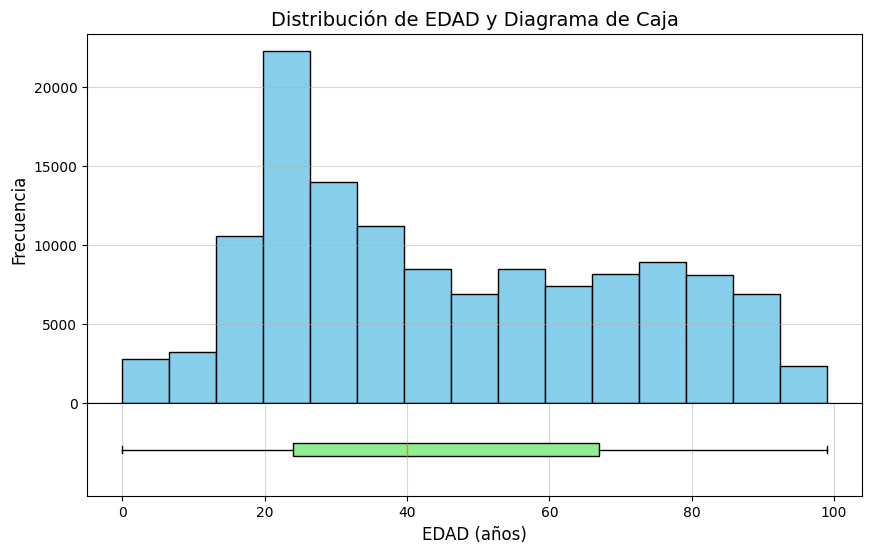

In [5]:
#Grafico de Edad


#
fig, (ax_hist, ax_box) = plt.subplots(
    2, 1,
    sharex=True,
    figsize=(10, 6),
    gridspec_kw={'height_ratios': [4, 1]} # Proporción de alturas [4 (hist), 1 (box)]
)

# 2. Eliminar el espacio vertical entre los subplots
fig.subplots_adjust(hspace=0)

# --- Histograma de EDAD (Superior) ---
# Se utiliza ax_hist para el histograma
ax_hist.hist(
    emergencia_data['EDAD'].dropna(),
    bins=15,
    color='skyblue',
    edgecolor='black'
)
ax_hist.set_title('Distribución de EDAD y Diagrama de Caja', fontsize=14)
ax_hist.set_ylabel('Frecuencia', fontsize=12)
ax_hist.grid(axis='y', alpha=0.5)

# Ocultar las etiquetas del eje X en el histograma para evitar redundancia
ax_hist.tick_params(axis="x", labelbottom=False)

# --- Box Plot (Diagrama de Caja) de EDAD (Inferior) ---
# Se utiliza ax_box para el box plot
ax_box.boxplot(
    emergencia_data['EDAD'].dropna(),
    vert=False, # Horizontal
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', color='black'),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='red', alpha=0.5) # Estilo de Outliers
)
ax_box.set_xlabel('EDAD (años)', fontsize=12)
ax_box.set_yticks([]) # Eliminar la etiqueta de Y para el box plot
ax_box.grid(axis='x', alpha=0.5)

plt.show()



In [6]:
# Contar la cantidad de valores NaN en la columna 'Genero'

emergencia_data['GENERO'] = emergencia_data['GENERO'].replace('', np.nan)

nan_count_genero = emergencia_data['GENERO'].isna().sum()

print(f"Cantidad de valores NaN en la columna 'GENERO': {nan_count_genero} \n")
print(f"Cantidad de valores en la columna 'GENERO': {len(emergencia_data) - nan_count_genero}  \n")

print(f"Porcentaje de valores en la columna 'GENERO': {nan_count_genero / len(emergencia_data) *100 }  \n")

Cantidad de valores NaN en la columna 'GENERO': 112252 

Cantidad de valores en la columna 'GENERO': 129989  

Porcentaje de valores en la columna 'GENERO': 46.338976473842166  



# Trabajo lara la columna GENERO

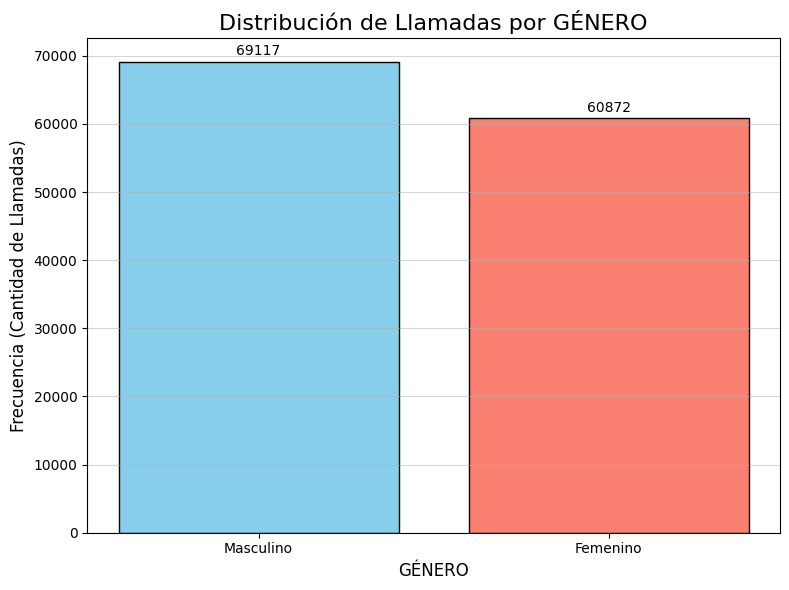

In [20]:
# histograma por genero.

emergencia_data['GENERO'].replace(['', ' '], np.nan, inplace=True)

# 2. Contar las ocurrencias de cada valor único en 'GENERO'
gendero_contar = emergencia_data['GENERO'].value_counts()

# 3. Generar el gráfico de barras
plt.figure(figsize=(8, 6))

bars = plt.bar(
    gendero_contar.index,
    gendero_contar.values,
    color=['skyblue', 'salmon', 'lightgreen'],
    edgecolor='black'
)

plt.title('Distribución de Llamadas por GÉNERO', fontsize=16)
plt.xlabel('GÉNERO', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Llamadas)', fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Añadir etiquetas de conteo
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('grafico_de_distribucion_barra_genero.png')
plt.show()

# Trabajo para la columna tipo de incidente

In [22]:
# Cantidad de incidentes
tipos_incidentes = emergencia_data['TIPO_INCIDENTE'].nunique()

print(f"Cantida de tipos de incidentes :{tipos_incidentes} \n ")
print(emergencia_data['TIPO_INCIDENTE'].unique())

print("\n\n")



Cantida de tipos de incidentes :81 
 
['Lesiones personales' 'Dolor torácico'
 'Inconsciente/paro cardiorrespiratorio'
 'Accidente de tránsito con heridos/muertos' 'Herido con pólvora'
 'Intento de suicidio' 'Disparos' 'Enfermo' 'Heridos'
 'Dificultad respiratoria' 'Caída' 'Trastorno mental' 'Intoxicaciones'
 'Convulsiones' 'Incidente rescate acuático' 'Accidente cerebro vascular'
 'Quemaduras' 'Síntomas gastrointestinales' 'Riña' 'Embriaguez'
 'Ideas de suicidio' 'Incendio estructural'
 'Patología gineco - obstétrica' 'Incendio forestal' 'Muerte natural'
 'Violencia sexual' 'Verificar situación' 'Abrir domicilio'
 'Sangrado vaginal' 'Incendio vehicular' 'Accidente tránsito simple'
 'Rescates' 'Persona pidiendo auxilio' 'Habitante de la calle' nan
 'Persona tendida en la vía' 'Electrocución / rescate'
 'Fuga de gas natural o propano' 'Solicitud apoyo / desacato'
 'Elemento caído y/o en peligro de caer.' 'Animal peligroso'
 'Atraco / hurto en proces' 'Muerto' 'Explosión'
 'Extraviados /

 ## Agrupar por 'TIPO_INCIDENTE' y calcular la mediana  por grupo.


In [18]:
#Agrupar por 'TIPO_INCIDENTE' y  calcular la mediana de la "EDAD"
mediana_edad_por_accidente = emergencia_data.groupby('TIPO_INCIDENTE')['EDAD'].median()

#Agrupar por 'TIPO_INCIDENTE' y calcular la cantidad total de incidentes.
cantidad_por_accidente = emergencia_data.groupby('TIPO_INCIDENTE')['EDAD'].count()

# Sacar solo filas donde EDAD es NaN
registros_nan_edad = emergencia_data[emergencia_data['EDAD'].isna()]

# Cuenta la cantidad de los TIPO_INCIDENTE en este subconjunto
conteo_nan_por_incidente = registros_nan_edad['TIPO_INCIDENTE'].value_counts()

# Procede a agrupar informacion
resultados_combinados = pd.DataFrame({
    'Edad Mediana': mediana_edad_por_accidente,
    'Cantidad de Registros': cantidad_por_accidente,
    'valores NaN en EDAD': conteo_nan_por_incidente
}).reset_index()

# se ordena por la Edad Mediana para toma de decisiones.
resultados_combinados_ordenados = resultados_combinados.sort_values(
    by='Edad Mediana',
    ascending=False
)


print(resultados_combinados_ordenados.to_string(index=False))


                           TIPO_INCIDENTE  Edad Mediana  Cantidad de Registros  valores NaN en EDAD
                        Rapto / secuestro          84.0                      1                  1.0
               Menor o persona abandonada          75.0                      9                 12.0
                          Abrir domicilio          74.0                     49                 34.0
                                Fallecido          72.0                      1                  1.0
                      Evento respiratorio          72.0                    916                488.0
                           Muerte natural          72.0                    181                296.0
         Accidente cerebro vascular (acv)          70.0                      3                  4.0
                  Dificultad respiratoria          69.0                  15992               5597.0
               Accidente cerebro vascular          68.0                   3817               1492.0


# Trabajo para la columna PRIORIDAD

Cantidad de tipos de prioridad sin repeticiones: 3 
 
['Alta' 'Media' 'Baja' nan]





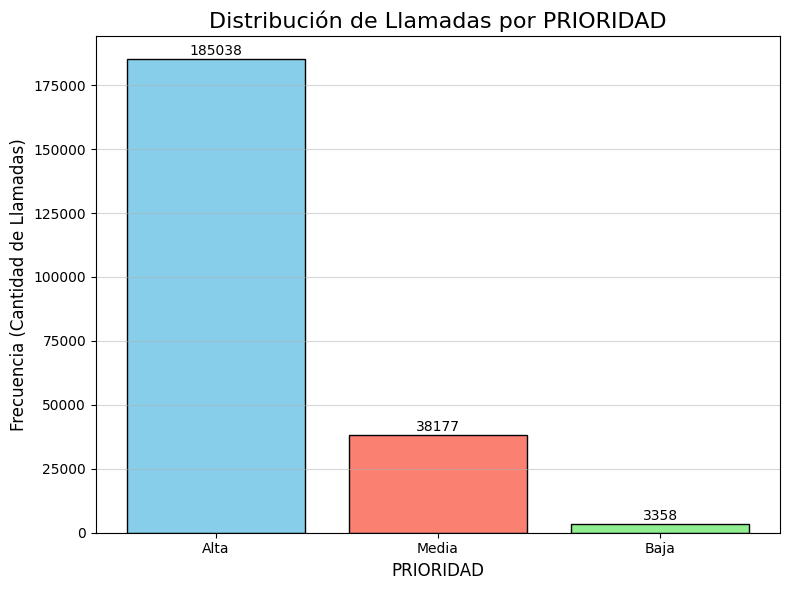

In [24]:
# histograma por prioridad.

# Cantidad estados de prioridad

cantidad_PRIORIDAD = emergencia_data['PRIORIDAD'].nunique()

print(f"Cantidad de tipos de prioridad sin repeticiones: {cantidad_PRIORIDAD} \n ")
print(emergencia_data['PRIORIDAD'].unique())

print("\n\n")
emergencia_data['PRIORIDAD'].replace(['', ' '], np.nan, inplace=True)

# 2. Contar las ocurrencias de cada valor único en 'GENERO'
prioridad_contar = emergencia_data['PRIORIDAD'].value_counts()

# 3. Generar el gráfico de barras
plt.figure(figsize=(8, 6))

bars = plt.bar(
    prioridad_contar.index,
    prioridad_contar.values,
    color=['skyblue', 'salmon', 'lightgreen'],
    edgecolor='black'
)

plt.title('Distribución de Llamadas por PRIORIDAD', fontsize=16)
plt.xlabel('PRIORIDAD', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Llamadas)', fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Añadir etiquetas de conteo
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('grafico_de_distribución_barra.png')
plt.show()

# Trabajo para la columna Clasificación final

In [25]:

print("\n\n")


# Cantidad de clasificacion final

cantidad_CLASIFICACION = emergencia_data['CLASIFICACION_FINAL'].nunique()

print(f"Cantidad de tipos de clasificacion final  sin repeticiones: {cantidad_CLASIFICACION} \n ")
print(emergencia_data['CLASIFICACION_FINAL'].unique())





Cantidad de tipos de clasificacion final  sin repeticiones: 9 
 
['Cancelado' 'Traslado' 'Falsa Alarma' 'Trasladado por Otro Recurso'
 'Desistimiento' 'No Ubica' 'Fallecido' 'Trasladado por Otro'
 'No Amerita Traslado' nan]
